In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import math

In [2]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

#Data Collection and Processing

In [3]:
#Loading the csv data to a Pandas Dataframe
df=pd.read_csv("Downloads/Walmart_sales.csv")


In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
#print first 5 rows in the Dataframe
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
#print last 5 rows of the Dataframe
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [7]:
#number of rows and columns
df.shape

(6435, 8)

In [8]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
#getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
#checking the number of missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
#getting the statistical measures of the data
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
df.Date.value_counts()

05-02-2010    45
23-12-2011    45
11-11-2011    45
18-11-2011    45
25-11-2011    45
              ..
07-01-2011    45
14-01-2011    45
21-01-2011    45
28-01-2011    45
26-10-2012    45
Name: Date, Length: 143, dtype: int64

In [13]:
#
df.Weekly_Sales.value_counts()

1643690.90    1
446751.45     1
1332261.01    1
1366193.35    1
1384870.51    1
             ..
551799.63     1
573498.64     1
553901.97     1
533161.64     1
760281.43     1
Name: Weekly_Sales, Length: 6435, dtype: int64

In [14]:
df.Temperature.value_counts()

50.43    11
67.87    10
76.67     9
76.03     9
70.28     9
         ..
34.93     1
38.53     1
41.10     1
45.54     1
74.09     1
Name: Temperature, Length: 3528, dtype: int64

In [15]:
df.Fuel_Price.value_counts()

3.638    39
3.630    34
2.771    29
3.891    29
3.524    28
         ..
2.863     1
2.995     1
3.053     1
3.448     1
3.576     1
Name: Fuel_Price, Length: 892, dtype: int64

In [16]:
df.Date.unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [17]:
df.Weekly_Sales.unique()

array([1643690.9 , 1641957.44, 1611968.17, ...,  734464.36,  718125.53,
        760281.43])

In [18]:
df.Temperature.unique()

array([42.31, 38.51, 39.93, ..., 75.87, 77.55, 74.09])

In [19]:
df.Fuel_Price.unique()

array([2.572, 2.548, 2.514, 2.561, 2.625, 2.667, 2.72 , 2.732, 2.719,
       2.77 , 2.808, 2.795, 2.78 , 2.835, 2.854, 2.826, 2.759, 2.705,
       2.668, 2.637, 2.653, 2.669, 2.642, 2.623, 2.608, 2.64 , 2.627,
       2.692, 2.664, 2.619, 2.577, 2.565, 2.582, 2.624, 2.603, 2.633,
       2.725, 2.716, 2.689, 2.728, 2.771, 2.735, 2.708, 2.843, 2.869,
       2.886, 2.943, 2.976, 2.983, 3.016, 3.01 , 2.989, 3.022, 3.045,
       3.065, 3.288, 3.459, 3.488, 3.473, 3.524, 3.622, 3.743, 3.807,
       3.81 , 3.906, 3.899, 3.907, 3.786, 3.699, 3.648, 3.637, 3.594,
       3.48 , 3.575, 3.651, 3.682, 3.684, 3.638, 3.554, 3.523, 3.533,
       3.546, 3.526, 3.467, 3.355, 3.285, 3.274, 3.353, 3.372, 3.332,
       3.297, 3.308, 3.236, 3.172, 3.158, 3.159, 3.112, 3.129, 3.157,
       3.261, 3.268, 3.29 , 3.36 , 3.409, 3.51 , 3.555, 3.63 , 3.669,
       3.734, 3.787, 3.845, 3.891, 3.877, 3.814, 3.749, 3.688, 3.561,
       3.501, 3.452, 3.393, 3.346, 3.286, 3.227, 3.256, 3.311, 3.407,
       3.417, 3.494,

# Visualizing Data

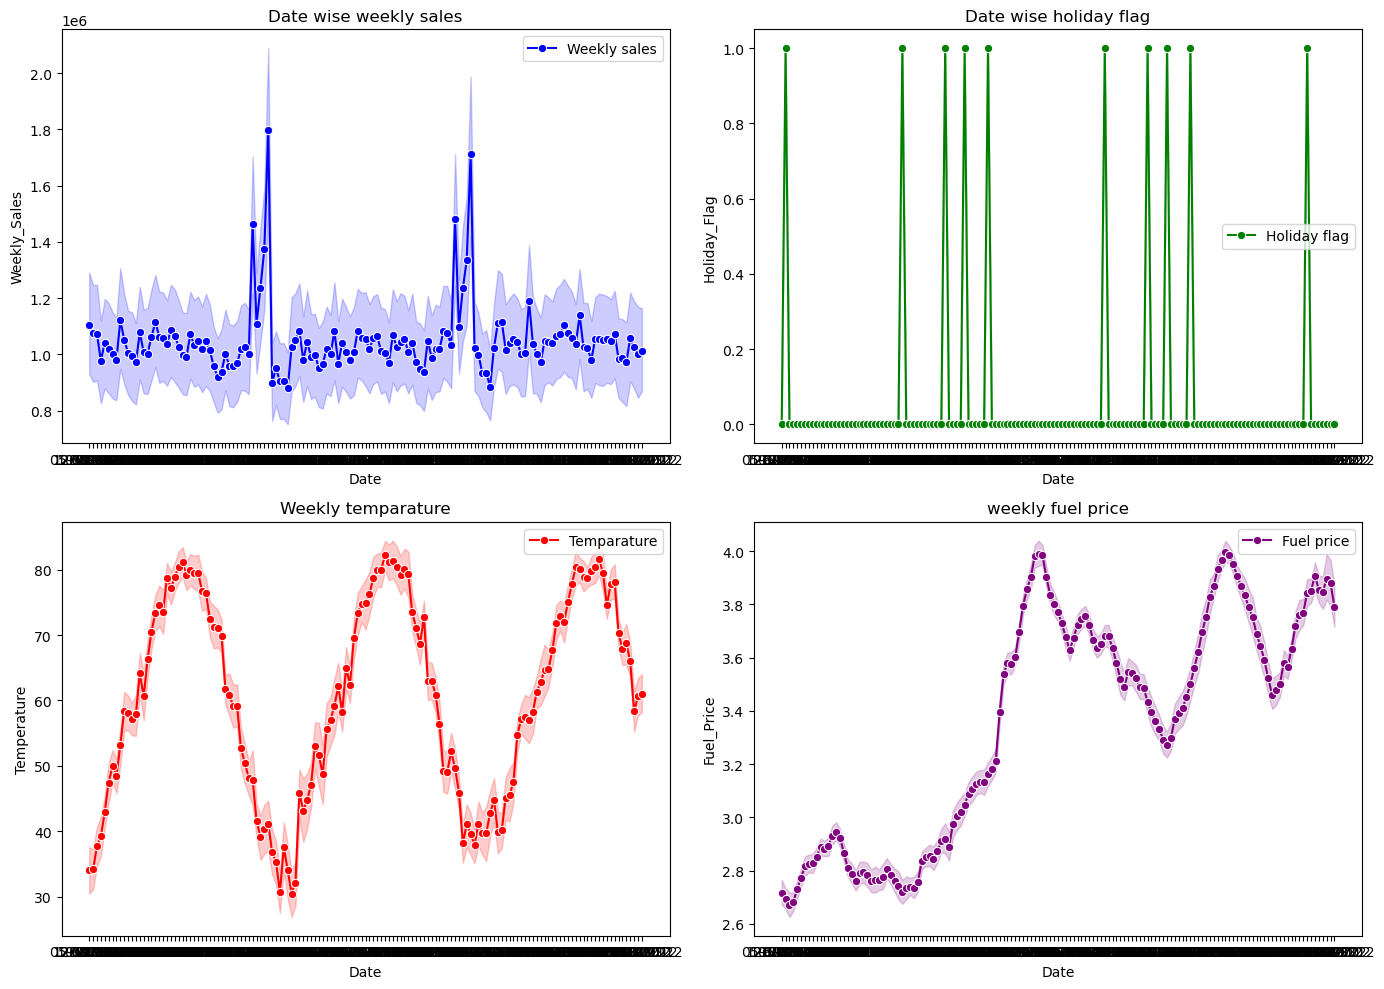

In [20]:
plt.figure(figsize=(14, 10))

# Line plots for Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Date', y='Weekly_Sales', marker='o', color='blue', label='Weekly sales')
plt.title('Date wise weekly sales')

plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='Date', y='Holiday_Flag', marker='o', color='green', label='Holiday flag')
plt.title('Date wise holiday flag')

plt.subplot(2, 2, 3)
sns.lineplot(data=df, x='Date', y='Temperature', marker='o', color='red', label='Temparature')
plt.title('Weekly temparature')

plt.subplot(2, 2, 4)
sns.lineplot(data=df, x='Date', y='Fuel_Price', marker='o', color='purple', label='Fuel price')
plt.title('weekly fuel price')

# Adjusting the layout
plt.tight_layout()
plt.show()

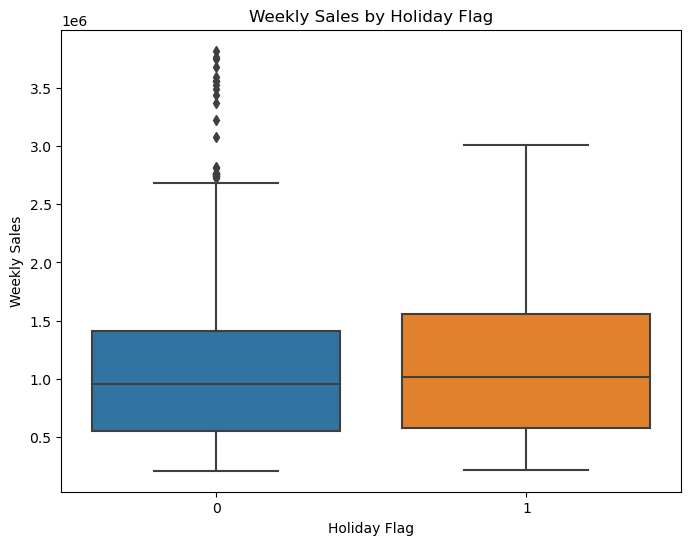

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()


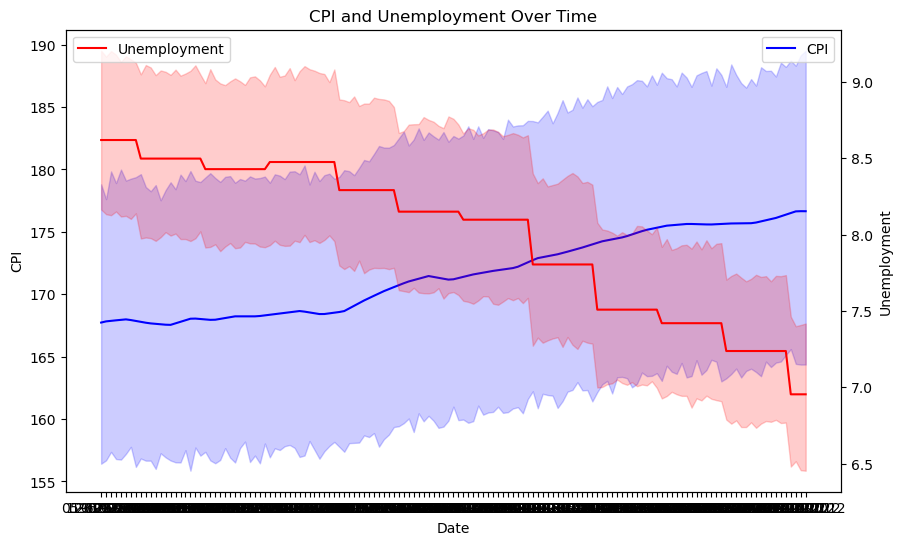

In [22]:
dates = df['Date']
cpi_values = df['CPI']
unemployment_values = df['Unemployment']

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting CPI
sns.lineplot(x=dates, y=cpi_values, label='CPI', color='blue')

# Plotting Unemployment on a separate axis
plt.twinx()
sns.lineplot(x=dates, y=unemployment_values, label='Unemployment', color='red')

# Adding labels and titles
plt.title('CPI and Unemployment Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.legend(loc='upper left')
plt.grid(False)

# Show plot
plt.show()

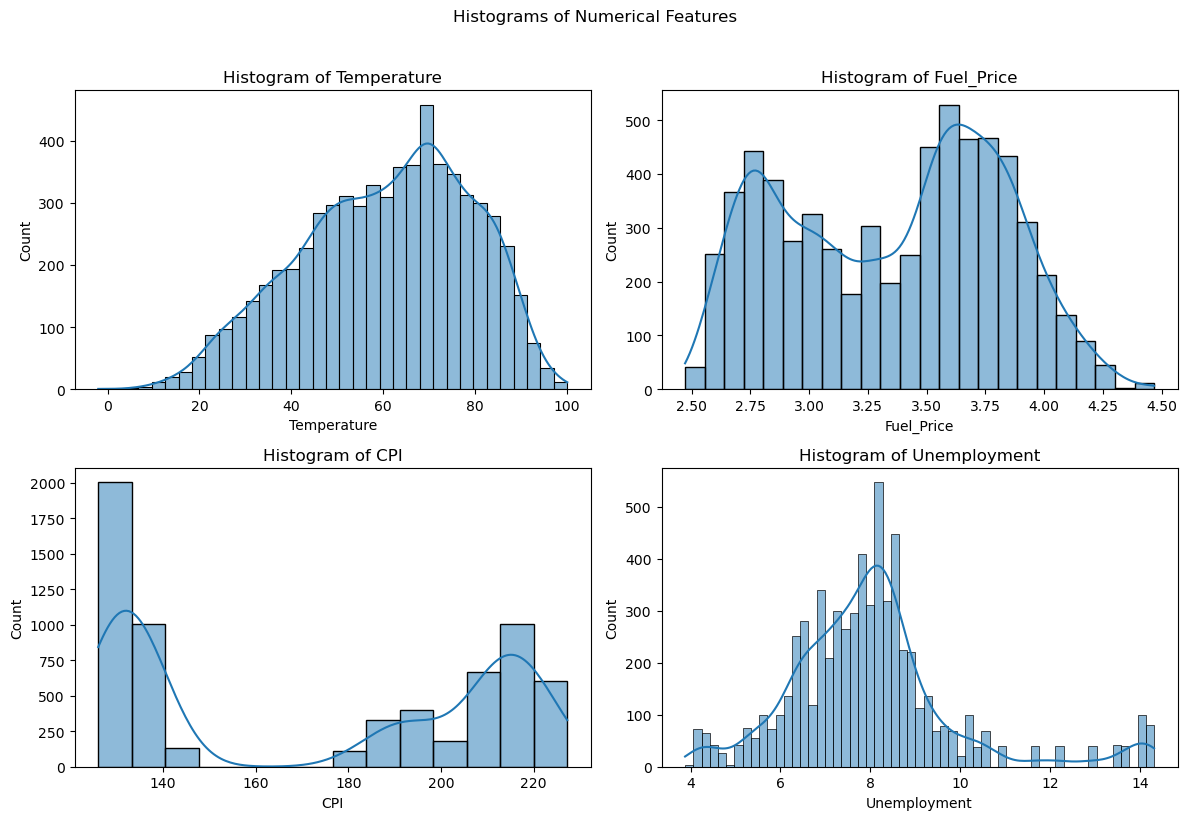

In [23]:
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Plot histograms using Seaborn
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()


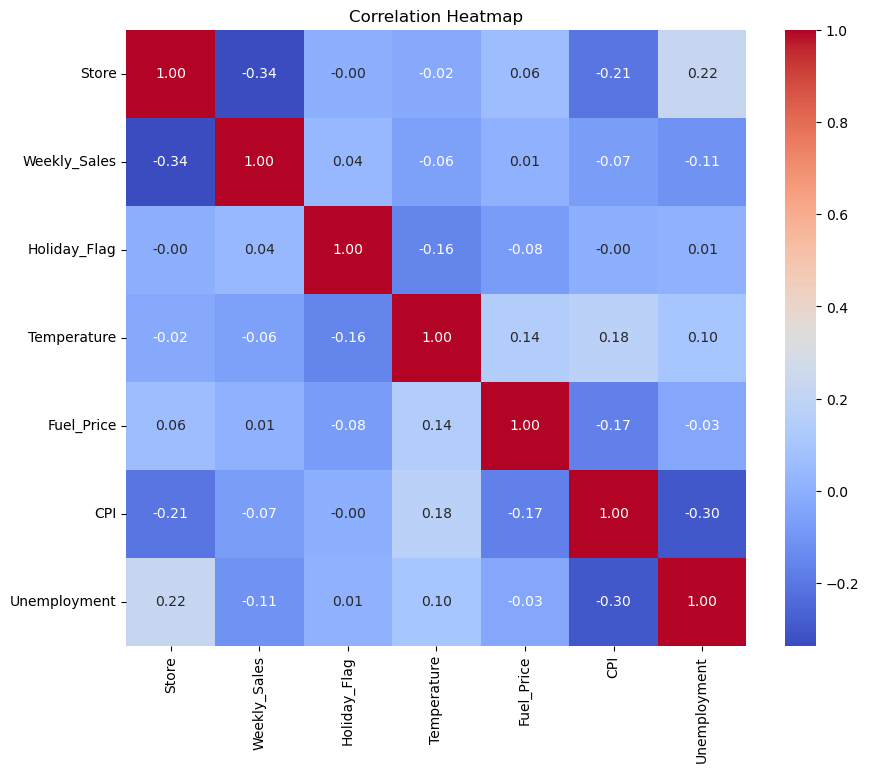

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



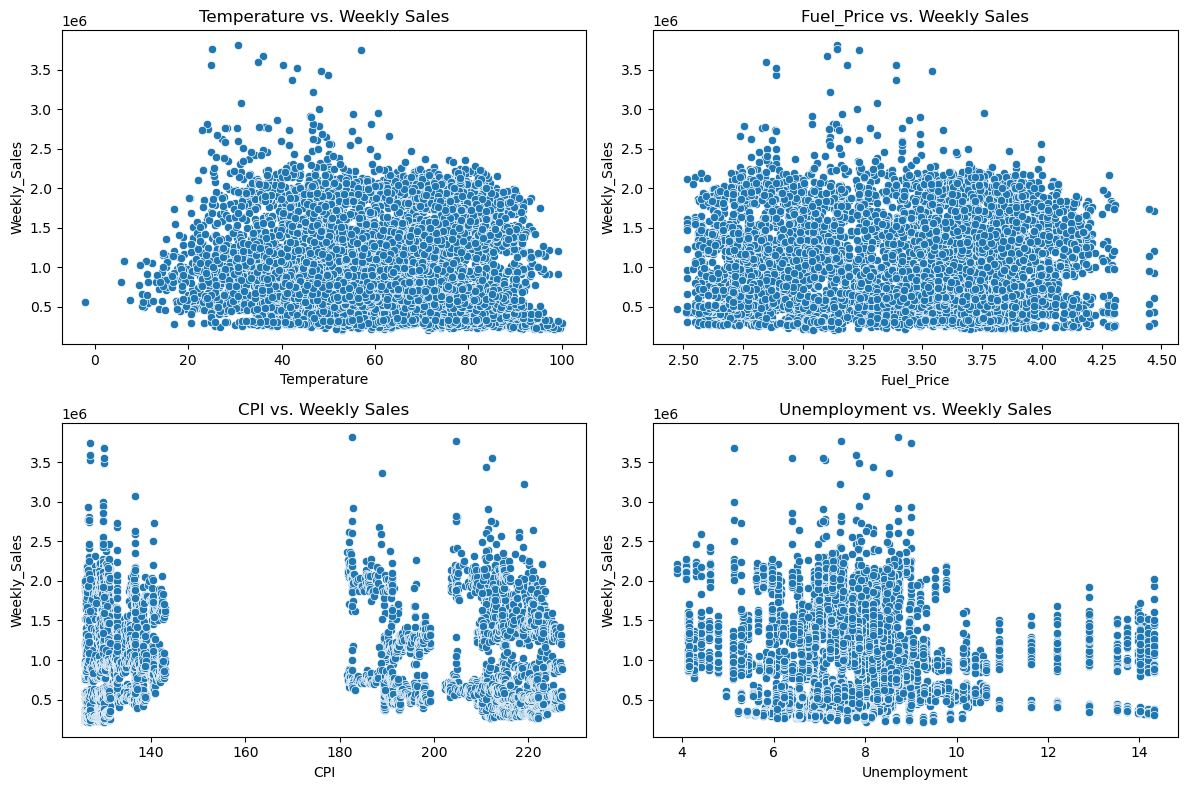

In [25]:
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
# Scatter plots for numerical features against Weekly Sales
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='Weekly_Sales', data=df)
    plt.title(f'{feature} vs. Weekly Sales')
plt.tight_layout()
plt.show()

In [26]:
# Assuming your data is stored in a DataFrame named 'df'
X = df.drop(columns=['Weekly_Sales', 'Date'])  # Features
Y = df['Weekly_Sales']  # Target variable

In [27]:
print(X)

      Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0         1             0        42.31       2.572  211.096358         8.106
1         1             1        38.51       2.548  211.242170         8.106
2         1             0        39.93       2.514  211.289143         8.106
3         1             0        46.63       2.561  211.319643         8.106
4         1             0        46.50       2.625  211.350143         8.106
...     ...           ...          ...         ...         ...           ...
6430     45             0        64.88       3.997  192.013558         8.684
6431     45             0        64.89       3.985  192.170412         8.667
6432     45             0        54.47       4.000  192.327265         8.667
6433     45             0        56.47       3.969  192.330854         8.667
6434     45             0        58.85       3.882  192.308899         8.667

[6435 rows x 6 columns]


In [28]:
#importing the scaler
from sklearn.preprocessing import MinMaxScaler
mn= MinMaxScaler()
X=mn.fit_transform(X)

In [29]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [30]:
print(X_train)

[[0.15909091 0.         0.75714286 0.05511022 0.87788478 0.23346751]
 [0.13636364 0.         0.22270059 0.4509018  0.65232047 0.47335634]
 [0.93181818 0.         0.61937378 0.32965932 0.00476591 0.49108683]
 ...
 [0.81818182 0.         0.868591   0.60721443 0.87213932 0.41192256]
 [0.84090909 1.         0.45694716 0.47895792 0.03960739 0.86361894]
 [0.13636364 0.         0.28708415 0.03907816 0.62736827 0.49214108]]


In [31]:
print(X_test)

[[0.38636364 0.         0.43493151 0.16683367 0.05653917 0.5101591 ]
 [0.52272727 0.         0.69412916 0.74749499 0.09094964 0.41527698]
 [0.02272727 0.         0.6646771  0.4509018  0.90206839 0.34138394]
 ...
 [1.         0.         0.28737769 0.15631263 0.55162447 0.49003259]
 [0.02272727 0.         0.63923679 0.12374749 0.83440628 0.41412689]
 [0.36363636 0.         0.25704501 0.37975952 0.02175325 0.28627564]]


In [32]:
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
# Build a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
r2_rf = r2_score(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf))

print(f'R2 Score (Random Forest): {r2_rf}')
print(f'RMSE (Random Forest): {rmse_rf}')


R2 Score (Random Forest): 0.9328074061921976
RMSE (Random Forest): 147127.15862397352


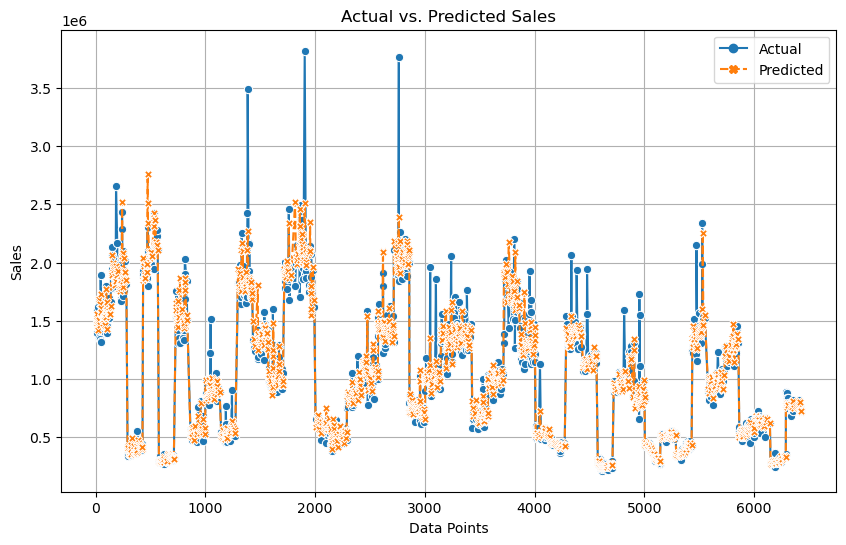

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to hold the actual and predicted values
plot_data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_rf})

# Plot using Seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, markers=True)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [60]:
model = DecisionTreeRegressor(random_state=42)

In [61]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [62]:
Y_pred_1 = model.predict(X_test)

In [39]:
print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test, Y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8843195281708366


In [40]:
mse = mean_squared_error(Y_test, Y_pred_1)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 193046.60587212868


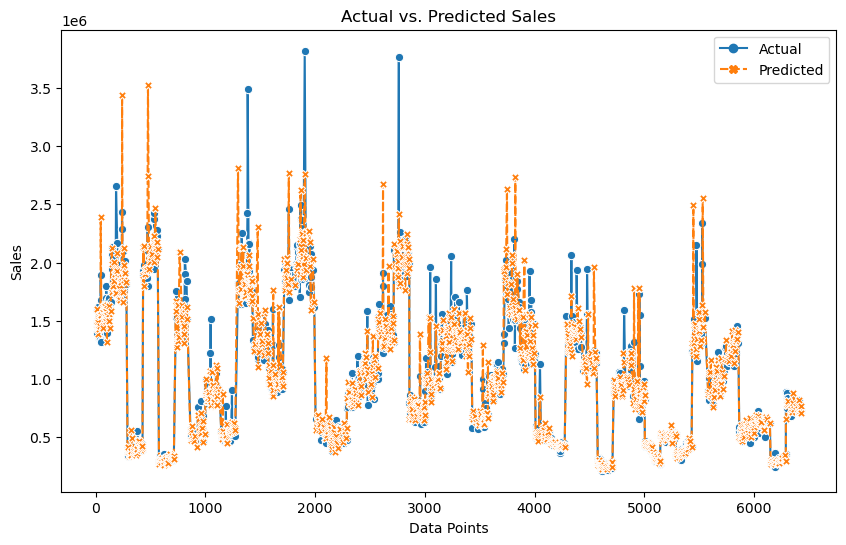

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to hold the actual and predicted values
plot_data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_1})

# Plot using Seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, markers=True)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.grid(False)
plt.show()

In [57]:

#calculating the R squared error
error_score=metrics.r2_score(Y_test,Y_pred_1)
print("R squared error:", error_score)


R squared error: 0.8843195281708366


In [43]:
#calculating errors
mse = metrics.mean_squared_error(Y_test, Y_pred_1)
print("Mean Squared Error:", mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred_1)
print("Mean Absolute Error:", mae)

Mean Squared Error: 37266992038.748985
Mean Absolute Error: 99998.66398601398


In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [45]:
from xgboost import XGBRegressor

model_1 = XGBRegressor()
model_1.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
# Make predictions on the testing data
Y_pred_2= model_1.predict(X_test)

In [47]:
# Evaluate the model
#Calculating the Accuracy
print("Training Accuracy :", model_1.score(X_train, Y_train))
print("Testing Accuracy :", model_1.score(X_test, Y_test))

Training Accuracy : 0.9922501921108203
Testing Accuracy : 0.9494565458772853


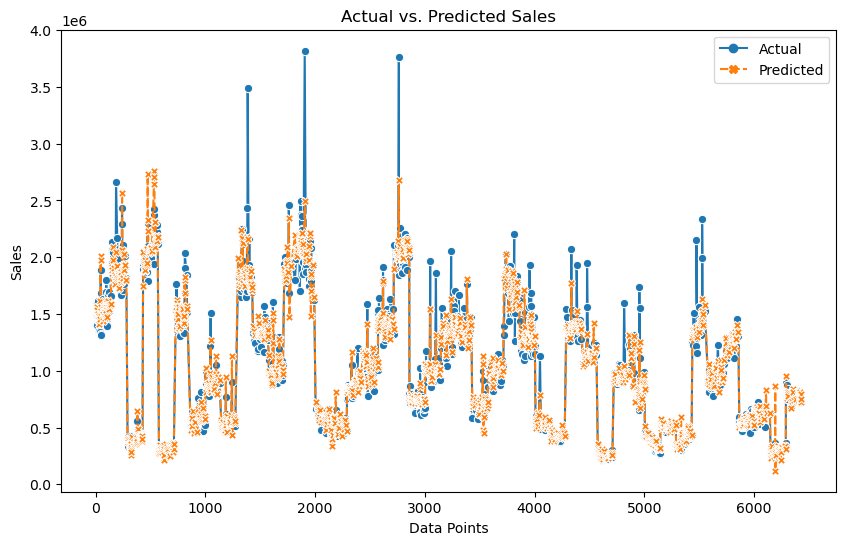

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to hold the actual and predicted values
plot_data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_2})

# Plot using Seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, markers=True)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.grid(False)
plt.show()

In [49]:
mse = mean_squared_error(Y_test, Y_pred_2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 127604.09263808202


In [50]:
!pip install catboost

In [51]:
from catboost import CatBoostRegressor

In [52]:
model_2 = CatBoostRegressor(verbose=False)
model_2.fit(X_train, Y_train)

In [53]:
# Make predictions on the testing data
Y_pred_3 = model.predict(X_test)

In [54]:
# Evaluate the model
#Calculating the Accuracy
print("Training Accuracy :", model_2.score(X_train, Y_train))
print("Testing Accuracy :", model_2.score(X_test, Y_test))

Training Accuracy : 0.9787205275748896
Testing Accuracy : 0.9513730561725057


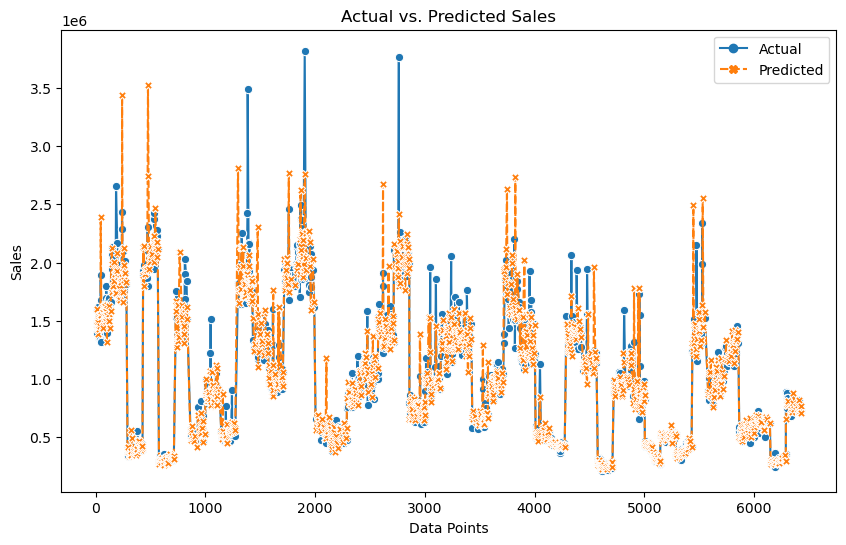

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to hold the actual and predicted values
plot_data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_3})

# Plot using Seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, markers=True)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.grid(False)
plt.show()

In [56]:
mse = mean_squared_error(Y_test, Y_pred_3)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 193046.60587212868
